# Tutorial week 4 

# Learning outcomes
1. Gentle introduction to what is computer vision
2. Review: Important concepts of image stored as Numpy array
3. Image cropping
4. Different types of color models: HSV, RGB and CIELAB
    * Split and merge image channels
    * Manipulate the image channels
5. Point operators.

# What is digital image processing / computer vision?

As humans, we perceive the 3D structure of the world around us with ease. For example, looking at a framed group portrait, you can easily count and name all the people in the picture and even guess at their emotions from their facial expressions.

Perceptual psychologists have spent decades trying to comprehend how visual system works and optical illusions have been discovered to solve the puzzle, a complete solution is still far beyond our reach. 

Computer vision / digital image processing is being utilized in diverse of real world applications:
- Optical character recognition (OCR): reading handwritten postal codes on letters and automatic plate recognition.

  ![OCR](https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Portable_scanner_and_OCR_%28video%29.webm/1200px--Portable_scanner_and_OCR_%28video%29.webm.jpg "Optical character recognition")
- Medical imaging: registering pre-operative and intra-operative imagery or performing long term studies of internal organ.

  ![CT scan](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRta2V0mlQ-4oVHOUfyhRGpyPm64T4smphtzg&s "CT scans")
- Self-driving vehicles.

  ![Autonomous driving](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQdDERoAxq7k7ujdso6ghyI2hm6yn2cK9pJAQ&s "autonomous vehicle")
- Surveillance: monitoring for intruders, analyzing highway traffic and monitoring pools for drowning victims.

  ![surveillance](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSP9mr_ytNAapxlWafQLG5AcZZKVZ2wgPheFQ&s "surveillance system")
- Fingerprint recognition and biometrics: automatic access authentication as well as forensic applications.

  ![biometrics](https://www.nec.co.nz/wp-content/uploads/2018/02/Close-up-of-womans-left-eye-showing-iris-recogntion-points-market.jpg "iris recognition")

In [2]:
import sys
# Python 3.8 is required
assert sys.version_info >= (3, 8)

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Setup

In [5]:
from utils import display_images

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

# Review: Representation of image as Numpy array
An image is a multidimensional array; it has columns and rows of pixels, and each pixel has a value. For different kinds of image data, the pixel value may be formatted in different ways. We can create a $4\times 4$ square black image from scratch by simply creating a 2D NumPy array as shown in the following cells.

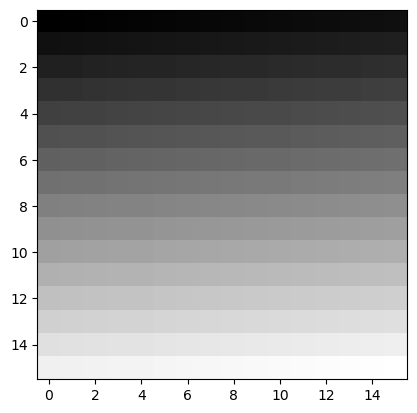

In [4]:
#create a custom array
#grayscale (2D array)

arr =  np.arange(0,256, dtype=np.uint8).reshape((16,16))

plt.imshow(arr, cmap= "gray", vmin=0, vmax=255)
plt.show()


#small value dark, large integer dark

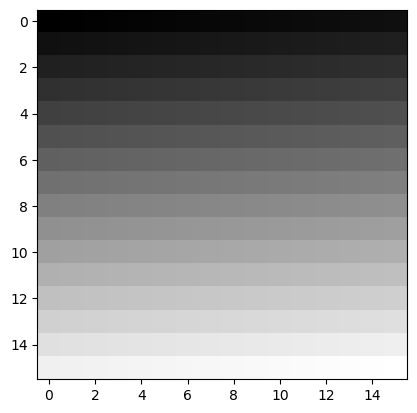

In [5]:
#change grayscale to RGB
#matplotlib (3D)
arr_3d = cv.cvtColor (arr,cv.COLOR_GRAY2BGR)

plt.imshow(arr_3d)
plt.show()
#When cv.cvtColor is used to convert from grayscale to BGR, each pixel in the grayscale image is expanded to three channels (B, G, R) with the same value for each channel. 
#This effectively makes a grayscale image that can be interpreted as an RGB image, where all colors are shades of gray.

In [6]:
#Indexing and slicing
#to access in arrray
arr[2,2]

34

In [7]:
arr[14,15]

239

In [8]:
arr[-2,-1]

239

In [9]:
#Slicing
arr[3:6, 3:6]

array([[51, 52, 53],
       [67, 68, 69],
       [83, 84, 85]], dtype=uint8)

In [10]:
img = np.zeros((4, 4), dtype = np.uint8)
print(img)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


Here, each pixel is represented by a single 8-bit integer, which means that the values of each pixel are in 0-255 range, where 0 is black, 255 is white and the in-between values are shades of gray. This is a **grayscale** image. You can use `cv.cvtColor()` to convert the images from one color space to another. We will discuss about image color spaces later.

In [11]:
img_bgr = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_bgr)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [12]:
print(img_bgr.shape)

(4, 4, 3)


**Exercise**
---
1. Create a $200 \times 200$ white image and display it. 
2. Leverage your image processing skills to create a simple wallpaper design as shown in the following image:

![pattern](img_embed/exercise_w4.jpg "Pattern")

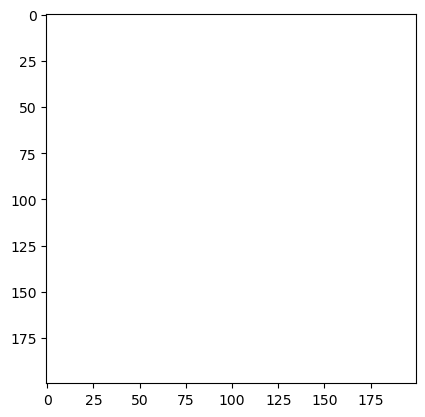

In [13]:
#Q1
arr =  np.full((200,200),255, dtype=np.uint8)

plt.imshow(arr, cmap= "gray", vmin=0, vmax=255)
plt.show()

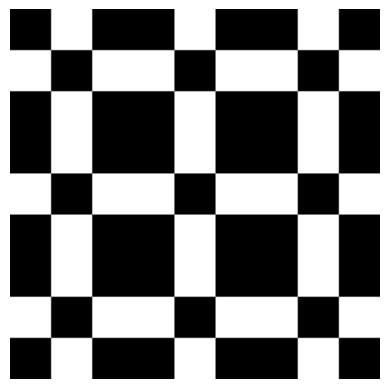

In [14]:
#Q2

#create the first one unit
#slicing is needed
#create a patch with alternating black and white
tile =  np.zeros((60,60),dtype=np.uint8)

#slice subpatch to assing new values
# create white regions in the tile
tile[:20, 20:40] = 255 #[row, columns] #so first 20 rows (0 to 20) and columns from 20 to 39
tile[20:40,:20]  = 255
tile[20:40, 40:] = 255
tile[40:,20:40]  = 255

# replicate the tile to create a 3x3 tiled image
img = np.tile(tile,(3,3))

plt.imshow(img,cmap="gray", vmin=0,  vmax=255)
plt.axis("off")
plt.show()

# 3 ways to extract regions from image
1. use callback function (GUI)
2. use 'cv.selectROI()
3. use external software 

In [6]:
# Load the image
img = cv.imread("images/flower.jfif")

# Display the image
from utils import display_images
display_images([img], ["image"])


In [28]:
# 1 way: GUI (callback)

def mouse (event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN: #left mouse click
        print(x, "," , y)
        cv.imshow("image", img)
        
cv.imshow("image",img)
cv.setMouseCallback("image", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

83 , 35


In [7]:
#slicing in numpy start with y 
flower= img[36: 122, 90:175]
display_images( flower,"flower")

In [19]:
#2nd way:
r =cv.selectROI("roi", img)

print(r)
cv.destroyAllWindows()

#the output is $(x,y,w,h)$,
## x and y are the bounding point 

(85, 34, 97, 93)


In [30]:
#3rd way:
x, y, w, h = r

flower = img[y: y+h, x:x+w]
display_images(flower,"flower")

## Access elements in an array

In [31]:
img = cv.imread('images/lena.jfif')

%timeit a = img[100, 30, 0]
%timeit b = img.item(100, 30, 0)

84.8 ns ± 1.55 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
86 ns ± 0.957 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


## Numpy array slicing
### Exercise
2. Extract the region of interest (flower) from the 'flower.jfif'.

# Cropping an image
Why crop an image? 
1. Remove all unwanted objects or areas from an image
2. Improve the overall composition of the image. Visit this [link](https://expertphotography.com/improve-your-composition-the-rule-of-thirds/) on how separating image into grids and putting the subject of interest on the intersection point could create a more compositional pleasing photo. This is known as of rule of thirds.
3. One of the image augmentation techniques in deep learning model training.

The operations are literally the same as extracting ROI.

## Divide an image into smaller patches using cropping
One practical application of cropping in OpenCV is to divide an image into smaller patches. The following example shows how to split image into a $2 \times 3$ grid.

In [8]:
img = cv.imread("images/dog.jfif")
img_copy = img.copy()
height, width = img.shape[:2]

# user defined parameters
num_horizontal_patch = 2
num_vertical_patch = 3

# M and N
M, N = width // num_horizontal_patch ,height // num_vertical_patch

for y in range(0, height, N):
   for x in range(0, width,M):
        x1 = x + M
        y1 = y + N
        
        if x1>=width and y1>= height:
            x1 =  width - 1
            y1 = height - 1
            cv.rectangle(img_copy, (x,y), (x1,y1), (0,255,0),1)
        elif x1>=width:
            x1 = width - 1
            cv.rectangle(img_copy, (x,y), (x1,y1), (0,255,0),1)
        elif y1>=height: 
            y1 = height - 1
            cv.rectangle(img_copy, (x,y), (x1,y1), (0,255,0),1)
        else:
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            
cv.imshow('patched image', img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

In [78]:
img = cv.imread('images/dog.jfif')
img_copy = img.copy()

height, width = img.shape[:2]
num_vertical_patches = 2
num_horizontal_patches = 3

# M and N are basically number of pixels per patch
M, N = int(height / num_vertical_patches), int(width / num_horizontal_patches)

x1, y1 = 0, 0

for y in range(0, height, M):
    for x in range(0, width, N):
        
        y1 = y + M
        x1 = x + N
        
        if x1>=width and y1>=height:
            x1 = width-1
            y1 = height-1
            tile = img[y:height, x:width]
            cv.rectangle(img_copy, (x,y), (x1, y1), (0, 255, 0), 1)
            cv.imshow('tile', tile)
            
        elif y1>=height:
            y1 = height-1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            
        elif x1>=width:
            x1 = width-1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            
        else:
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            
cv.imshow('patched image', img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

## Exercise
1. Divide the image into 4 equal regions. Swap their positions as shown below:

   ![dog_swap](img_embed/crop_swap.PNG "dog")
2. Cover the face of lena with white mask as shown as the following:

   ![lena_mask](img_embed/lena_mask.PNG "lena mask")

3. Extract the region of interest (flower) from the 'flower.jfif'.

In [40]:
#Q1
img = cv.imread('images/dog.jfif')
img_copy = img.copy()
height, width = img.shape[:2]

num_vertical_patches = 2
num_horizontal_patches = 2

#M and N are basically number of pixels per patch
M, N = int(height / num_vertical_patches), int(width / num_horizontal_patches)

# extract patches and store them in a list
patches = []

for y in range(0, height, M):
    row_patches = []
    for x in range(0, width, N):
        x1 = x + N
        y1 = y + M
        if x1 > width:
            x1 = width
        if y1 > height:
            y1 = height
        patch = img[y:y1, x:x1]
        row_patches.append(patch)
    patches.append(row_patches)
    
    
#rearrange patches (example: swap corners)
rearranged_patches = [
    [patches[1][1], patches[1][0]],
    [patches[0][1], patches[0][0]]
]

#place rearranged patches back into the image
reconstructed_img = np.zeros_like(img)

for i, row_patches in enumerate(rearranged_patches):
    for j, patch in enumerate(row_patches):
        x = j * N
        y = i * M
        reconstructed_img[y:y + patch.shape[0], x:x + patch.shape[1]] = patch

#display the original and reconstructed images
cv.imshow('Original Image', img)
cv.imshow('Reconstructed Image', reconstructed_img)
cv.waitKey(0)
cv.destroyAllWindows()


In [44]:
#Q2
img = cv.imread('images/lena.jfif')
img_copy = img.copy()
height, width,_ = img.shape[:3]

num_vertical_patches = 3
num_horizontal_patches = 3

#M and N are basically number of pixels per patch
M, N = int(height / num_vertical_patches), int(width / num_horizontal_patches)

#extract patches and store them in a list
patches = []

for y in range(0, height, M):
    row_patches = []
    for x in range(0, width, N):
        x1 = x + N
        y1 = y + M
        if x1 > width:
            x1 = width
        if y1 > height:
            y1 = height
        patch = img[y:y1, x:x1]
        row_patches.append(patch)
    patches.append(row_patches)
    
    
#change middle patch to white mask
patches[1][1]= np.ones_like(patches[1][1]) * 255

#recontsructing white mask
rearranged_patches = patches

#place rearranged patches back into image
reconstructed_img = np.zeros_like(img)

for i, row_patches in enumerate(rearranged_patches):
    for j, patch in enumerate(row_patches):
        x = j * N
        y = i * M
        reconstructed_img[y:y + patch.shape[0], x:x + patch.shape[1]] = patch

#display the original and reconstructed images
cv.imshow('Original Image', img)
cv.imshow('Reconstructed Image', reconstructed_img)
cv.waitKey(0)
cv.destroyAllWindows()


In [53]:
#Q3

img = cv.imread('images/flower.jfif')

r =cv.selectROI("roi", img)

#extract coordiantes from ROI selection
x, y, w, h = int(r[0]), int(r[1]), int(r[2]), int(r[3])

#extract the ROI
roi = img[y:y+h, x:x+w]

#close the ROI selection window
cv.destroyWindow("roi")

cv.imshow('Original Image', img)

#create a window with the same size as the ROI
cv.namedWindow('Extracted ROI', cv.WINDOW_NORMAL)
cv.resizeWindow('Extracted ROI', w, h)
cv.imshow('Extracted ROI', roi)
cv.waitKey(0)
cv.destroyAllWindows()


# Color space / color model
In the most common color space, RGB (Red Green Blue), colors are represented in terms of their red, green, and blue components. In more technical terms, RGB describes a color as a tuple of 3 components. Each component can take a value between 0 and 255, where the tuple (0, 0, 0) represents black and (255, 255, 255) represents white. RGB is considered an "additive" color space, and colors can be imagined as being produced from shining quantities of red, blue and green light onto a black background.

There are so many color spaces because different color spaces are useful for different purposes. We will typically work with 3 kinds of color models: blue-green-red (BGR), grayscale and hue-saturation-value (HSV).

In reality, color is a continuous phenomenon, meaning that there are an infinite number of colors. Color spaces, however represent color through discrete structures (a fixed number of whole number integer values), which is acceptable since the human eye and perception are also limited. 

## RGB color space
It is an additive colorspace where colors are obtained by a linear combination of Red, Green and Blue values. 

There are some inherent problems asociated with RGB colorspace:
- significant perceptual non-uniformity.
- mixing of chrominance and luminance data.

## LAB color space
3 components:
- L: lightness (intensity).
- A: color component ranging from green to red.
- B: color component ranging from blue to yellow.

The L component is independent of color information and encodes brightness only. 

## YCrCb color space
Like LAB colorspace, the luminance and chrominances are separated into different channels. Y is used to represent luminance (or luma), Cb represents blue-difference, and Cr represents red-difference.

## HSV color space
1. Hue is the color attribute that describes pure color. 
2. Saturation is the quantity that reflect the degree to which pure color is diluted by white light.
3. Value or intensity is brightness.

![hsv cylindrical spectrum](img_embed/hsv_cylindrical.jfif "HSV")

> **Important** 🗝️
>
> In OpenCV, hue range is $[0,179]$, saturation range is $[0,255]$, and value range is $[0,255]$. Different software use different scales. So if you are comparing OpenCV values with them, you need to **normalize these ranges**. 
> The important takeaway is: *Lighting condition can mean the difference between success and failure of your computer vision algorithm.* Thus, color space which could factor out luminance into different channel should be the choice.

# Color spaces
1. RGB
2. CIELAB
3. HSV (focus of this course)
#change the value to see what happen 

In [47]:
#manipute HSV channels
img = cv.imread("images/car.jpg")
#change BGR to HSV
img_hsv= cv.cvtColor(img, cv.COLOR_BGR2HSV)
#split the channels
h, s, v = cv.split(img_hsv)


# set a coonstant for H CHANNEL [0-179]
h_bias = 25
h_new = np.zeros_like(h) + h_bias
h_new = np.uint8(h_new)

transform = cv.merge((h_new, s, v))
transform_display = cv.cvtColor(transform, cv.COLOR_HSV2BGR)

from utils import display_images
display_images([img, transform_display], ("original", f"hue={h_bias}"))

In [83]:
#saturation 
h, s, v = cv.split(img_hsv)

# set a constant for s channel [0-255]
s_bias =  255
s_new = np.zeros_like(s) +s_bias

# set a coonstant for H CHANNEL [0-179]
s_bias = 25
s_new = np.zeros_like(s) + s_bias
s_new = np.uint8(s_new)

transform = cv.merge((s_new, s, v))
transform_display = cv.cvtColor(transform, cv.COLOR_HSV2BGR)

from utils import display_images
display_images([img, transform_display], ("original", f"hue={s_bias}"))


## Splitting and merging Image channels
The B, G and R channels can be split into their individual planes when needed. Then the individual channels can be merged back together to form BGR image again. The splitting and merging operations can be attained by the following functions respectively:
* `cv.split(m)`, where m is a multi-channel array.
* `cv.merge(mv)`, where mv is a tuple / list of matrices to be merged; all the matrices in mv must have the same size and the same depth (precision of each pixel).

In [49]:
b, g, r = cv.split(img)
img_merge = cv.merge((b, g, r))

print(f"Are the two images the same? {np.equal(img, img_merge).all()}")

Are the two images the same? True


## Manipulate image channels

### HSV color channels

#### Hue channel

In [84]:
# set the hue to a certain value
img = cv.imread("images/meal.jpg")
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

h, s, v = cv.split(img_hsv)
h_new = np.zeros_like(h) + 30
h_new = np.uint8(h_new)

transform = cv.merge((h_new, s, v))
transform_display = cv.cvtColor(transform, cv.COLOR_HSV2BGR)

display_images([img, transform_display], ("original", "hue=30"))

In [85]:
# change the saturation 
img = cv.imread("images/meal.jpg")
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

h, s, v = cv.split(img_hsv)
s_new = np.zeros_like(s) + 255
s_new = np.uint8(s_new)

transform = cv.merge((h, s_new, v))
transform_display = cv.cvtColor(transform, cv.COLOR_HSV2BGR)

display_images([img, transform_display], ("original", "saturation decrease"))

### Exercise
1. Display the blue, green and red channel of the **lena** image simultaneously. Comment on the images displayed.
2. Display the following images which originates from the file "images/dog.jfif".

![exercise_fig](img_embed/diff_color_channels.jpg "color dogs")

In [58]:
#Q1
img = cv.imread("images/lena.jfif")
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

h, s, v = cv.split(img_hsv)

#ccreate an all-zero array for the other two channels (saturation and value)
zeros = np.zeros_like(h)

blue_channel_image = cv.merge([h, zeros, zeros])
green_channel_image = cv.merge([zeros, s, zeros])
red_channel_image = cv.merge([zeros, zeros, v])

cv.imshow('Blue Channel', blue_channel_image)
cv.imshow('Green Channel', green_channel_image)
cv.imshow('Red Channel', red_channel_image)

cv.waitKey(0)
cv.destroyAllWindows()

In [71]:
#Q2
img = cv.imread("images/dog.jfif")
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

h, s, v = cv.split(img_hsv)

h_red = np.zeros_like(h) +0
h_green = np.zeros_like(h) +60
h_blue = np.zeros_like(h) +120

h_red = np.uint8(h_red)
h_green = np.uint8(h_green)
h_blue = np.uint8(h_blue)

#merge each hue with the original saturation and value
red_hsv = cv.merge((h_red, s, v))
green_hsv = cv.merge((h_green, s, v))
blue_hsv = cv.merge((h_blue, s, v))

#convert HSV images back to BGR
red_bgr = cv.cvtColor(red_hsv, cv.COLOR_HSV2BGR)
green_bgr = cv.cvtColor(green_hsv, cv.COLOR_HSV2BGR)
blue_bgr = cv.cvtColor(blue_hsv, cv.COLOR_HSV2BGR)

display_images([red_bgr, green_bgr, blue_bgr], ["Red Hue", "Green Hue", "Blue Hue"])

# Point operator 

## Point operator
It is merely mathematical operations on each pixel value of an image. The formula is as follows:
$$f(x, y) = \alpha f(x, y) + \beta$$

In [89]:
#Point Operators
np.uint8([-1, 0,255, 256,257])

#need define own function 
#to enhance reduce brightness and contrast
#because need to clip the (-10 to 300) to (0 to 255) truncate

def point_op (img, alpha, beta):
    """Point operators on image
    Arguments:
    ---
    img: source image (uint8)
    alpha, beta: user defined parameters
    
    Returns:
    ---
    Linearly transformed uint8 array
    ---
    """
    
    img = img.astype(np.float32)
    res = alpha * img + beta
    res = np.clip(res, 0,255)
    return np.uint8(res)

In [90]:
# load an image to change its brightness
img = cv.imread("images/camera.jpg")

alpha = 1.2 # increase contrast (>1), vice versa
beta = 30   # increase brightness (>0), vice versa
dst = point_op(img, alpha = alpha, beta = beta)

display_images([img,dst], ("original","pixel_transform"))

In [91]:
# Lets define the point operator function (multiplication, addition, subtraction and division)
def point_op(img, alpha, beta):
    """Point operator function
    Argument:
    ---
    img: input image
    alpha: coefficient
    beta: bias
    
    Returns:
    ---
    Unsigned 8-bit image array"""
    img = img.astype(np.float32)
    res = alpha * img + beta
    # clip the pixel values 
    res = np.clip(res, 0, 255)
    return np.uint8(res)

### Enhance the contrast and brighten the image

In [92]:
gray = cv.imread('images/camera.jpg', 0)
transform = point_op(gray, 2, 0)

display_images([gray, transform], ("grayscale", "transform"))

### Lower the contrast and darken the image

In [88]:
transform2 = point_op(gray, 1, -50)

display_images([gray, transform2], ("grayscale", "darken"))

## Weekly activity
1. Create a **random noise color and grayscale** image. You can set your own width and height, but keep the total number of pixels of both images identical.
2. Convert the code chunk found under section <a href="#Section1">Divide an image into smaller patches using cropping</a> into a function with the following signature:
```python
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
 # img is the source image
 # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
 # line_color is the color of the grid line.
 # The output of the function should be image with grids
```
3. How would you *change the brightness* of a **color image**? Suggest **two ways** to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.
4. Provide at least one common use cases for the following color spaces:
    - RGB
    - HSV
    - CIELAB

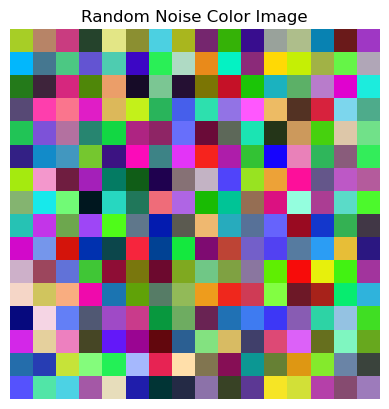

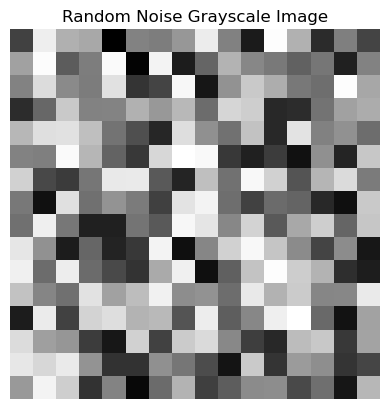

In [74]:
#Q1

random_color = np.random.randint(0, 256, size=(16, 16,3), dtype=np.uint8)

plt.imshow(random_color, cmap='gray', vmin=0, vmax=255)
plt.title('Random Noise Color Image')  
plt.axis('off')
plt.show()


#grayscale 
random_gray = np.random.randint(0, 256, size=(16, 16), dtype=np.uint8)
plt.imshow(random_gray, cmap= "gray", vmin=0, vmax=255)
plt.title('Random Noise Grayscale Image')  
plt.axis('off')
plt.show()




In [9]:
#Q2
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color=(0, 255, 0)):
    #make a copy of the original image
    img_copy = img.copy()
    
    #get image dimensions
    height, width = img.shape[:2]

    #calculate size of each grid patch
    M = int(height / num_vertical_grid)
    N = int(width / num_horizontal_grid)

    # draw grid lines
    for i in range(1, num_vertical_grid):
        cv.line(img_copy, (0, i * M), (width, i * M), line_color, 1)
    for j in range(1, num_horizontal_grid):
        cv.line(img_copy, (j * N, 0), (j * N, height), line_color, 1)

    return img_copy

# Example usage:
if __name__ == "__main__":
    img = cv.imread('images/dog.jfif')

    #define number of grid patches
    num_vertical_patches = 2
    num_horizontal_patches = 2

    #apply the crop_grid function
    grid_image = crop_grid(img, num_horizontal_patches, num_vertical_patches)

    #display the image with grid overlay
    cv.imshow('Image with Grid', grid_image)
    cv.waitKey(0)
    cv.destroyAllWindows()


In [10]:
#Q3
#using pixel transform
img = cv.imread("images/dog.jfif")

alpha = 1.2 # increase contrast (>1), vice versa
beta = 30   # increase brightness (>0), vice versa
dst = point_op(img, alpha = alpha, beta = beta)

display_images([img,dst], ("original","pixel_transform"))

NameError: name 'point_op' is not defined

In [11]:
#using hsv by adjusting the value
def adjust_brightness_hsv(image, value):
    """
    Adjust the brightness of the image using HSV color space.

    Parameters:
    - image: Input color image (BGR format).
    - value: Brightness adjustment value. Positive value increases brightness, negative decreases.

    Returns:
    - Adjusted image.
    """
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)
    
    #adjust the Value channel (brightness)
    v = cv.add(v, value)
    
    # clip the Value channel to [0, 255] range
    v = np.clip(v, 0, 255)
    
  
    hsv = cv.merge([h, s, v])
    adjusted_img = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
    return adjusted_img

if __name__ == "__main__":
    img = cv.imread('images/dog.jfif')
    
    #increase value by 50
    brighter_img = adjust_brightness_hsv(img, 50)

    cv.imshow('Original Image', img)
    cv.imshow('Brighter Image (HSV)', brighter_img)
    cv.waitKey(0)
    cv.destroyAllWindows()


In [ ]:
#Q4
#RGB is used in initial CV task since they are used in camera, smartphones and computer monitors.
#HSV is used to control color thresholding. Therefore, it can be more dynamic as color can be split based on hues and saturation level. This make it easier to detect color under different brightness
#CIELAB convert colors between different devices while maintaining consistency. It is used in printing and textile whereby accuracy and consistency is important. 